In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.utils import column_or_1d
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.utils import check_array

import seaborn as sns

from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR as regression_svr

In [489]:
youtube_videos = pd.read_csv('youtube_videos.tsv',sep='\t')
transcoding_measurements = pd.read_csv('transcoding_mesurment.tsv',sep='\t')

## Datasets preview

In [490]:
youtube_videos.head()

,id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url
0,uDNj-_5ty48,267,373,274,568,320,29.97,0.00,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
1,uDNj-_5ty48,267,512,396,480,270,29.97,29.97,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
2,uDNj-_5ty48,267,324,263,400,226,29.97,29.97,flv1,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
3,uDNj-_5ty48,267,85,55,176,144,12.00,12.00,mpeg4,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
4,WCgt-AactyY,31,1261,1183,640,480,24.00,0.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...


In [491]:
youtube_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168286 entries, 0 to 168285
Data columns (total 11 columns):
id                  168286 non-null object
duration            168286 non-null int64
bitrate             168286 non-null int64
bitrate(video)      168286 non-null int64
height              168286 non-null int64
width               168286 non-null int64
frame rate          168286 non-null float64
frame rate(est.)    168286 non-null float64
codec               168286 non-null object
category            168286 non-null object
url                 168286 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 14.1+ MB


In [492]:
transcoding_measurements.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


In [493]:
transcoding_measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 22 columns):
id             68784 non-null object
duration       68784 non-null float64
codec          68784 non-null object
width          68784 non-null int64
height         68784 non-null int64
bitrate        68784 non-null int64
framerate      68784 non-null float64
i              68784 non-null int64
p              68784 non-null int64
b              68784 non-null int64
frames         68784 non-null int64
i_size         68784 non-null int64
p_size         68784 non-null int64
b_size         68784 non-null int64
size           68784 non-null int64
o_codec        68784 non-null object
o_bitrate      68784 non-null int64
o_framerate    68784 non-null float64
o_width        68784 non-null int64
o_height       68784 non-null int64
umem           68784 non-null int64
utime          68784 non-null float64
dtypes: float64(4), int64(15), object(3)
memory usage: 11.5+ MB


In [494]:
X, y = np.split(transcoding_measurements,[-1],axis=1)
y = column_or_1d(y)

y

array([0.612, 0.98, 1.216, ..., 0.752, 5.444, 3.076], dtype=object)

In [495]:
to_drop = ['id','umem','duration','frames','size']

In [496]:
X = X.drop(columns=to_drop)
X

,codec,width,height,bitrate,framerate,i,p,b,i_size,p_size,b_size,o_codec,o_bitrate,o_framerate,o_width,o_height
0,mpeg4,176,144,54590,12,27,1537,0,64483,825054,0,mpeg4,56000,12,176,144
1,mpeg4,176,144,54590,12,27,1537,0,64483,825054,0,mpeg4,56000,12,320,240
2,mpeg4,176,144,54590,12,27,1537,0,64483,825054,0,mpeg4,56000,12,480,360
3,mpeg4,176,144,54590,12,27,1537,0,64483,825054,0,mpeg4,56000,12,640,480
4,mpeg4,176,144,54590,12,27,1537,0,64483,825054,0,mpeg4,56000,12,1280,720
5,mpeg4,176,144,54590,12,27,1537,0,64483,825054,0,mpeg4,56000,12,1920,1080
6,mpeg4,176,144,54590,12,27,1537,0,64483,825054,0,mpeg4,56000,15,176,144
7,mpeg4,176,144,54590,12,27,1537,0,64483,825054,0,mpeg4,56000,15,320,240
8,mpeg4,176,144,54590,12,27,1537,0,64483,825054,0,mpeg4,56000,15,480,360
9,mpeg4,176,144,54590,12,27,1537,0,64483,825054,0,mpeg4,56000,15,640,480


In [497]:
X = pd.get_dummies(X,columns=['codec'])
X = pd.get_dummies(X,columns=['o_codec'])

In [498]:
min_max_scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 5))
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X

/Users/eduardo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.000000,0.000000,0.030319,0.744102,0.019369,0.022344,0.0,0.002909,0.005145,0.0,...,0.000000,0.000000,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
1,0.000000,0.000000,0.030319,0.744102,0.019369,0.022344,0.0,0.002909,0.005145,0.0,...,0.412844,0.512821,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
2,0.000000,0.000000,0.030319,0.744102,0.019369,0.022344,0.0,0.002909,0.005145,0.0,...,0.871560,1.153846,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
3,0.000000,0.000000,0.030319,0.744102,0.019369,0.022344,0.0,0.002909,0.005145,0.0,...,1.330275,1.794872,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
4,0.000000,0.000000,0.030319,0.744102,0.019369,0.022344,0.0,0.002909,0.005145,0.0,...,3.165138,3.076923,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
5,0.000000,0.000000,0.030319,0.744102,0.019369,0.022344,0.0,0.002909,0.005145,0.0,...,5.000000,5.000000,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
6,0.000000,0.000000,0.030319,0.744102,0.019369,0.022344,0.0,0.002909,0.005145,0.0,...,0.000000,0.000000,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
7,0.000000,0.000000,0.030319,0.744102,0.019369,0.022344,0.0,0.002909,0.005145,0.0,...,0.412844,0.512821,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
8,0.000000,0.000000,0.030319,0.744102,0.019369,0.022344,0.0,0.002909,0.005145,0.0,...,0.871560,1.153846,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
9,0.000000,0.000000,0.030319,0.744102,0.019369,0.022344,0.0,0.002909,0.005145,0.0,...,1.330275,1.794872,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0


In [499]:
y

array([0.612, 0.98, 1.216, ..., 0.752, 5.444, 3.076], dtype=object)

In [500]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
11281,0.412844,0.512821,0.185540,2.753832,0.101685,0.101777,0.0,0.097872,0.039390,0.0,...,0.412844,0.512821,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
54005,1.330275,1.794872,0.632662,1.098760,0.025179,0.012271,0.0,0.068710,0.041917,0.0,...,5.000000,5.000000,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
31659,0.871560,1.153846,0.012194,2.294388,0.030021,0.069016,0.0,0.021017,0.001100,0.0,...,1.330275,1.794872,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0
45355,1.330275,1.794872,0.145972,2.280954,0.195623,0.154109,0.0,0.496168,0.014483,0.0,...,0.412844,0.512821,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0
9743,0.871560,1.153846,0.117132,2.875528,0.008716,0.013616,0.0,0.012489,0.003420,0.0,...,5.000000,5.000000,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0
6279,3.165138,3.076923,0.422549,2.869899,0.131706,0.345966,0.0,0.799459,0.284062,0.0,...,1.330275,1.794872,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0
20199,0.871560,1.153846,0.204477,2.883100,0.022274,0.049461,0.0,0.036353,0.023357,0.0,...,1.330275,1.794872,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
50962,0.412844,0.512821,0.169715,2.753832,0.077474,0.076300,0.0,0.044733,0.029993,0.0,...,3.165138,3.076923,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
66044,0.000000,0.000000,0.031343,0.744102,0.336045,0.339552,0.0,0.075452,0.071528,0.0,...,0.871560,1.153846,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0
26063,1.330275,1.794872,0.418662,2.753832,0.191749,0.182802,0.0,0.155715,0.183308,0.0,...,5.000000,5.000000,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0


## SVR (Support Vector Regression) 

As SVM são idealizadas para servirem como classificadores. Porém, podem ser utilizadas para regressão ao se fazer um passo adicional de treinamento em que os valores da regressão são estimados a partir das probabilidades de pertinência às classes obtidas com testes adicionais.

As SVMs tratam de aprender uma fronteira de decisão a partir de dados de treinamento (as amostras do problema) para classificar futuras amostras desconhecidas entre duas classes distintas (vamos chamar de A e B). Mas há outros tipos de problemas em que não se deseja classificar os novos dados, e sim calcular um valor de saída a partir das características de entrada. O processo é mais ou menos o mesmo, mas a fronteira de decisão é usada como a função aproximada que gera os resultados. A regressão linear é um exemplo clássico desse tipo de problema, em que a partir de um conjunto de dados se "aprende" uma equação que pode então ser utilizada para calcular o resultado a partir de uma nova sequência de parâmetros. 

Support Vector Regression é uma extensão do Support Vector Classification que é capaz de realizar regressões. Esse método realiza o mapeamento dos dados em um espaço multidimensional através de um mapeamento não-linear (geralmente utilizando kernels) e então realiza uma regressão linear neste espaço multidimensional transformado.

A ideia básico dos SV é a criação de hiperplanos para separar os dados.

O SVR depende apenas de um subconjunto dos dados de treinamento, porque a função custo para a construção do modelo ignora os dados de treinamento perto da previsão do modelo.


## Os principais parâmetros do SVR são:

   - Kernel: define o tipo de kernel que será utilizado;
   - C (cost): A constante de regularização define o peso de uma classificação errônea de exemplos de treinamento com relação a simplicidade da superfície de decisão. Um C baixo torna a superfície de decisão suave, enquanto um C alto tem como objetivo classificar todos os exemplos de treinamento corretamente, dando ao modelo a liberdade de selecionar mais amostras como vetores de suporte. Ou seja, o parâmetro faz o peso entre acurácia e eficácia, onde um C pequeno tende a aumentar a acurácia e um C grande tende a executar mais rapidamente.

   - gamma (utilizado somente no RBF): define até onde chega a influência de um único exemplo de treinamento, com valores baixos significando "longe" e valores altos significando "perto". Basicamente um gamma muito grande causa overfitting e um gamma muito pequeno faria com que o RBF se tornasse muito parecido com um linear, já que a influência de um vetor seria muito grande.

   - epsilon: Determina o grau de tolerância a erros de aproximação. É, resumidamente, a margem de erro que não é penalizado na regressão, ou seja, faixa de valores que estão entre as linhas limítrofes e são considerados.


## Utilizando o kernel RBF

In [501]:
reg1 = regression_svr(kernel='rbf', degree=3 , gamma='auto_deprecated' , coef0=0.0 , tol=0.001 , C=1.0 , epsilon=0.1 ,shrinking=True , cache_size=200 , verbose=False , max_iter=-1 ) 


In [502]:
reg1.fit(X_train,y_train)

/Users/eduardo/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [503]:
pred1 = reg1.predict(X_test)
pred1

array([ 2.77644426, 42.54460903,  1.85410459, ...,  1.46443744,
        7.53827984,  1.27169694])

In [504]:
mean_squared_error(y_test,pred1)

35.302355846219434

In [505]:
mean_absolute_error(y_test,pred1)

1.8651673502466708

In [506]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [507]:
mean_absolute_percentage_error(y_test,pred1)

15.368771441249132

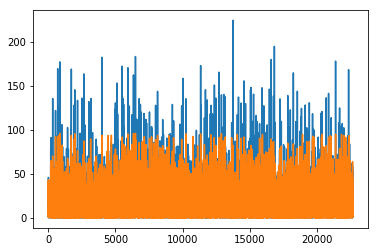

In [508]:
plt.plot(y_test)

plt.plot(pred1)
plt.show()

#### Obs: Note que há uma ocorrência bem grande de erros comparando os resultados de predição com os valores esperados.